Datasets loaded successfully.
Stock Data Shape: (13, 6)
Countries Data Shape: (15, 6)


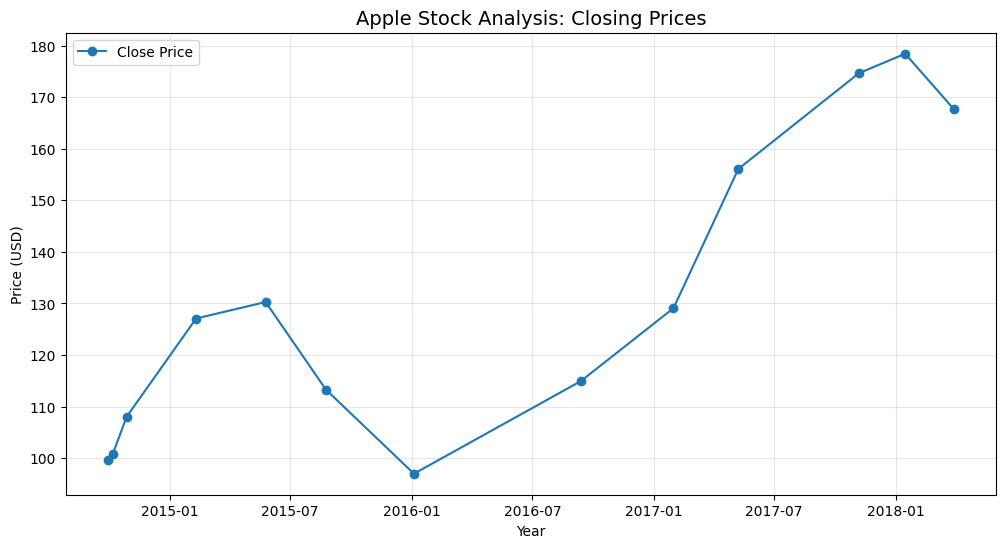

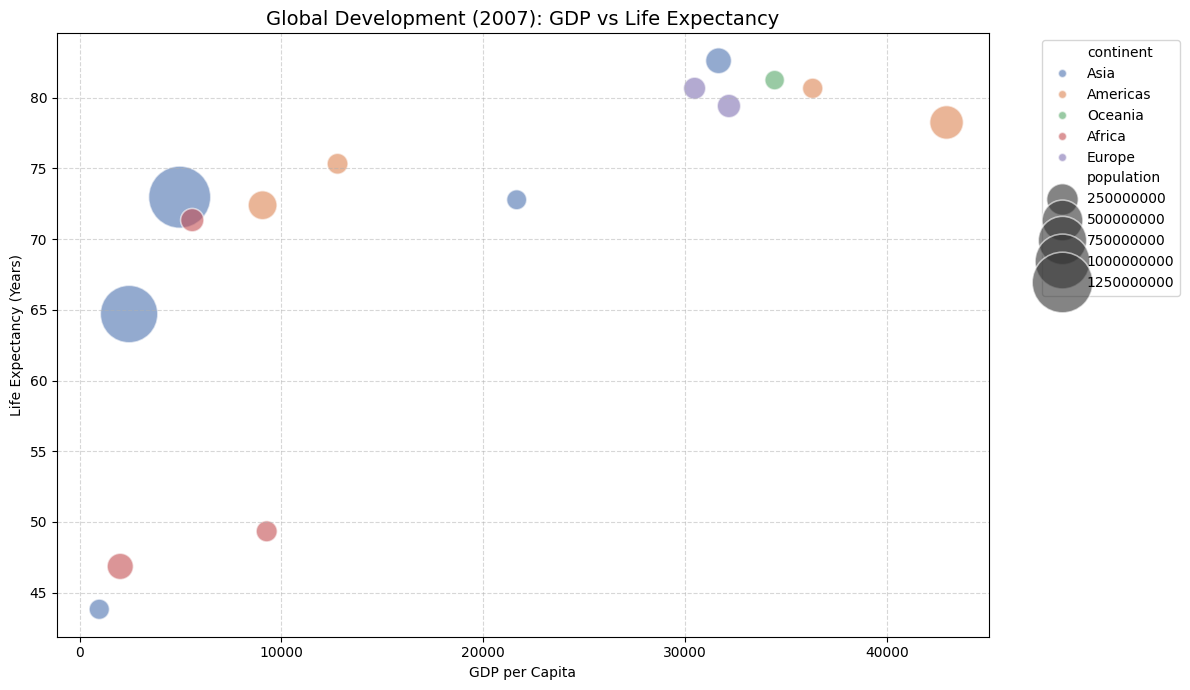

In [2]:
# ========================================================
# Workshop: Data Handling & Visualization
# Student Name: Bouzid Mohamed El Khallil
# Topic: Stock Market & Demographics Analysis
# ========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import io

# --------------------------------------------------------
# 1. Data Preparation
# --------------------------------------------------------

# Raw Data: Apple Stock Prices (2014-2018)
stock_csv = """Date,Open,High,Low,Close,Adj Close,Volume
2014-09-29,100.59,100.69,98.04,99.62,93.51,142718700
2014-10-06,99.95,102.38,98.31,100.73,94.56,280258200
2014-10-27,104.85,108.04,104.70,108.00,101.38,220230600
2015-02-09,118.55,127.48,118.43,127.08,120.28,303206800
2015-05-25,132.60,132.91,129.12,130.28,123.83,198148600
2015-08-24,94.87,113.31,92.00,113.29,108.16,500363000
2016-01-04,102.61,105.85,96.43,96.96,92.97,343790200
2016-09-12,102.65,116.13,102.53,114.92,112.07,388228200
2017-01-30,120.93,130.49,120.62,129.08,126.52,249781200
2017-05-08,149.03,156.42,149.03,156.10,153.67,173470600
2017-11-06,172.37,176.24,171.72,174.67,173.34,138425400
2018-01-15,177.90,180.10,175.07,178.46,177.74,127571200
2018-03-29,167.80,171.75,166.90,167.78,167.78,38398505"""

# Raw Data: Countries Statistics (2007)
countries_csv = """country,year,population,continent,life_exp,gdp_cap
Afghanistan,2007,31889923,Asia,43.828,974.58
Argentina,2007,40301927,Americas,75.32,12779.38
Australia,2007,20434176,Oceania,81.235,34435.37
Brazil,2007,190010647,Americas,72.39,9065.80
Canada,2007,33390141,Americas,80.653,36319.24
China,2007,1318683096,Asia,72.961,4959.11
Egypt,2007,80264543,Africa,71.338,5581.18
France,2007,61083916,Europe,80.657,30470.02
Germany,2007,82400996,Europe,79.406,32170.37
India,2007,1110396331,Asia,64.698,2452.21
Japan,2007,127467972,Asia,82.603,31656.07
Nigeria,2007,135031164,Africa,46.859,2013.98
Saudi Arabia,2007,27601038,Asia,72.777,21654.83
South Africa,2007,43997828,Africa,49.339,9269.66
United States,2007,301139947,Americas,78.242,42951.65"""

# Load datasets
df_stock = pd.read_csv(io.StringIO(stock_csv))
df_stock['Date'] = pd.to_datetime(df_stock['Date'])
df_stock.set_index('Date', inplace=True)

df_countries = pd.read_csv(io.StringIO(countries_csv))

# Print summary to verify data loading
print("Datasets loaded successfully.")
print(f"Stock Data Shape: {df_stock.shape}")
print(f"Countries Data Shape: {df_countries.shape}")

# --------------------------------------------------------
# 2. Static Visualization (Matplotlib & Seaborn)
# --------------------------------------------------------

# 2.1 Line Chart: Stock Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(df_stock.index, df_stock['Close'], marker='o', linestyle='-', color='#1f77b4', label='Close Price')
plt.title('Apple Stock Analysis: Closing Prices', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 2.2 Bubble Chart: GDP vs Life Expectancy
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_countries,
    x='gdp_cap',
    y='life_exp',
    size='population',
    hue='continent',
    sizes=(200, 2000),
    alpha=0.6,
    palette='deep'
)
plt.title('Global Development (2007): GDP vs Life Expectancy', fontsize=14)
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy (Years)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --------------------------------------------------------
# 3. Interactive Visualization (Plotly)
# --------------------------------------------------------

# 3.1 Candlestick Chart for Stocks
fig_stock = go.Figure(data=[go.Candlestick(
    x=df_stock.index,
    open=df_stock['Open'],
    high=df_stock['High'],
    low=df_stock['Low'],
    close=df_stock['Close']
)])

fig_stock.update_layout(
    title='Interactive Stock Market Analysis - Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Stock Price (USD)',
    template='plotly_white'
)
fig_stock.show()

# 3.2 Interactive Bubble Chart for Countries
fig_gapminder = px.scatter(
    df_countries,
    x="gdp_cap",
    y="life_exp",
    size="population",
    color="continent",
    hover_name="country",
    log_x=True,
    size_max=60,
    title="Interactive Demographics Analysis (Bouzid Mohamed El Khallil)"
)

fig_gapminder.update_layout(
    xaxis_title="GDP per Capita (Log Scale)",
    yaxis_title="Life Expectancy"
)
fig_gapminder.show()